# Assignment 4

* Tanja Gurtner - 17-677-295
* Cyrill Georg Meier - 17-552-316

In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

## Exercise 1

In [ ]:
def generate_er_graph(N, p):
  G = nx.Graph()
  G.clear_edges()

  G.add_nodes_from(range(N))
  possible_links = (N * (N - 1)) // 2

  #print(f"Adding an Edge with a probability of {p:.4f}, max. Edges {possible_links}")
  added_edges = 0

  for nodeA in range(0, N):
      for nodeB in range(nodeA + 1, N):
          r = random.random()

          if r < p:
              G.add_edge(nodeA, nodeB)
              added_edges += 1
              if added_edges >= possible_links:
                  break
      if added_edges >= possible_links:
          break

  #print(f"Added total {added_edges} Edges.")
  return G

In [ ]:
def get_lcc(G):
  #print(f"Graph is connected: {nx.is_connected(G)}")
  # We sort the connected components based on their size in a descending order. The first element corrsponds to the largest component $LCC$.
  comps = sorted(nx.connected_components(G), key = len, reverse = True)
  lcc = comps[0]
  n_lcc = len(lcc)
  #print(f"All the connected components, sorted descending: \n {comps}")
  #print(f"All the nodes belonging to the LCC: \n {lcc}")
  #print(f"# Nodes in LCC: {n_lcc}")
  return lcc

In [ ]:
N = 100
#p = random.random()
#er_graph = nx.erdos_renyi_graph(N,p)
#er_graph = generate_er_graph(N, p)

p_values = np.logspace(-3, 0, 100)

er_graphs = []
llc_sizes = []

for p in p_values:
  #er_graph = nx.erdos_renyi_graph(N,p)
  er_graph = generate_er_graph(N, p)
  llc = get_lcc(er_graph)
  er_graphs.append(er_graph)
  llc_sizes.append(len(llc))

In [ ]:
fractions = [llc_size / N for llc_size in llc_sizes] # N_{LCC} / N
#print(fractions)

In [ ]:
sum(fractions)/N

0.6382000000000001

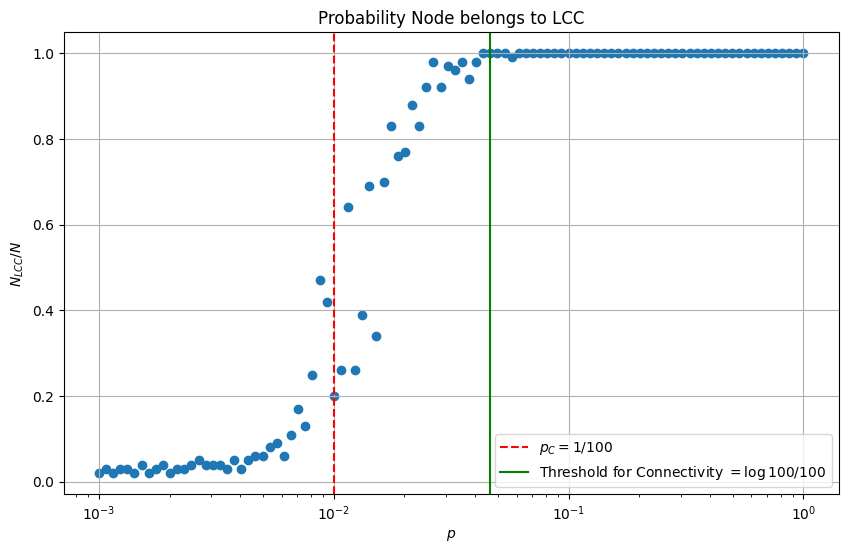

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(p_values, fractions, marker='o')
plt.xscale('log')
plt.xlabel('$p$')
plt.ylabel('$N_{LCC} / N$')
plt.title('Probability Node belongs to LCC')
plt.axvline(x=1/N, color='r', linestyle='--', label=f'$p_C = 1/{N}$')
plt.axvline(x=np.log(N)/N, color='g', linestyle='-', label=f'Threshold for Connectivity $= \log {N} / {N}$')
plt.legend()
plt.grid(True)
plt.show()

## Exercise 2

In [ ]:
p_values2 = np.logspace(-3, 0, 100)

er_graphs2 = []
clustering_coefficients = []
path_lengths = []

for p in p_values2:
  er_graph = generate_er_graph(N=100, p=p)
  er_graphs2.append(er_graph)

  c = nx.average_clustering(er_graph)
  clustering_coefficients.append(c)

  if nx.is_connected(er_graph):
    d = nx.average_shortest_path_length(er_graph)
  else:
    d = 0

  path_lengths.append(d)

avg_c = np.mean(clustering_coefficients)
avg_d = np.mean(path_lengths)

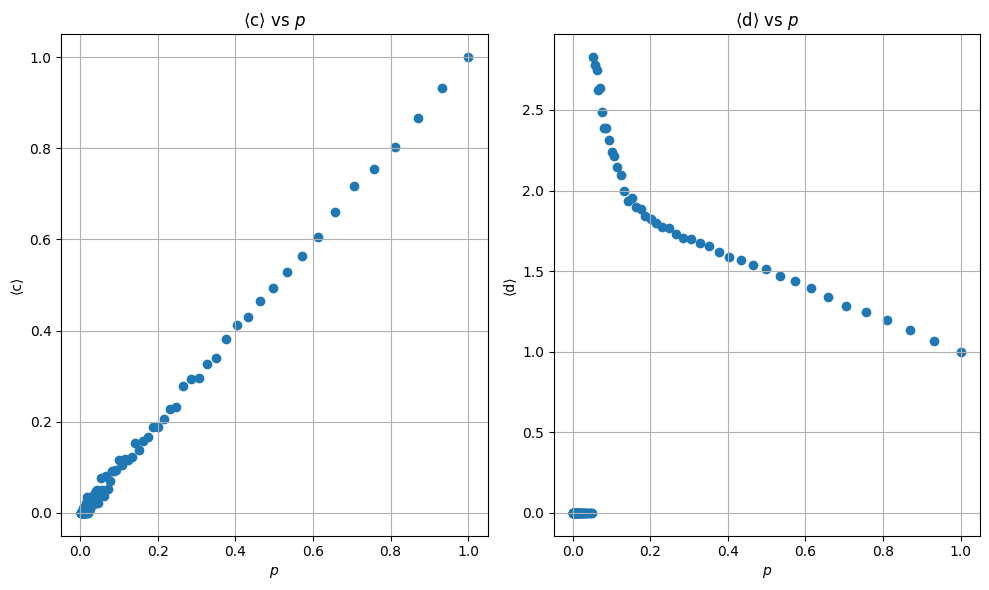

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(p_values, clustering_coefficients, marker='o')
plt.title('⟨c⟩ vs $p$')
plt.xlabel('$p$')
plt.ylabel('⟨c⟩')
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(p_values, path_lengths, marker='o')
plt.title('⟨d⟩ vs $p$')
plt.xlabel('$p$')
plt.ylabel('⟨d⟩')
plt.grid()

plt.tight_layout()
plt.show()

In the context of the Erdős-Rényi (ER) model, the results for the average clustering coefficient ⟨c⟩ and the average path length ⟨d⟩ as functions of the edge creation probability
𝑝
p can be interpreted as follows:

Clustering Coefficient (⟨c⟩ vs. p):
At small values of
𝑝
p, the graph is sparsely connected, leading to a low clustering coefficient. This is because there are fewer triangles (sets of three nodes where every node is connected to both of the others) in the network. As
𝑝
p increases, the probability of forming links between nodes increases, leading to more interconnected nodes and, consequently, a higher clustering coefficient. The linear-like increase observed in the plot indicates that as
𝑝
p grows, so does the tendency for nodes to form triangles. However, since the ER model generates random graphs, the clustering remains lower compared to real-world networks, where clustering tends to be higher due to more structured connections.

Average Path Length (⟨d⟩ vs. p):
Initially, at low
𝑝
p values, the graph is mostly disconnected, which results in a high average path length, as it takes many steps to traverse from one node to another. As
𝑝
p increases, more connections are formed, rapidly decreasing the average path length. This drop occurs because the network transitions from a disconnected state to a connected one, where most nodes can be reached through fewer steps. The curve levels off as
𝑝
p becomes large, indicating that once the graph is sufficiently connected, adding more links does not significantly reduce the path length further.

These results reflect the small-world phenomenon, where even random networks can exhibit short average path lengths once a sufficient number of edges is present. The transition observed in the path length corresponds to the emergence of the giant component in random networks, where a critical value of
𝑝
p causes most nodes to become part of a large connected component. Once this giant component forms, the average path length decreases sharply, as seen in the graph.

## Exercise 3

In [ ]:
def plot_network_graph(G):
    plt.figure(figsize=(8, 6))
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, edge_color='gray', font_size=12, font_weight='bold')
    plt.show()

In [ ]:
def generate_1d_lattice_periodic(N,k):
  G = nx.Graph()
  G.add_nodes_from(range(1,N+1))
  #print(G.nodes())

  for node in range(1,N+1):
    for i in range(1,k+1):
      node_r = (node + i) if (node + i) <= N else (node + i) - N
      node_l = (node - i) if (node - i) >= 1 else (node - i) + N

      if not G.has_edge(node, node_r) and node != node_r:
        G.add_edge(node, node_r)

      if not G.has_edge(node, node_l) and node != node_l:
        G.add_edge(node, node_l)

  return G

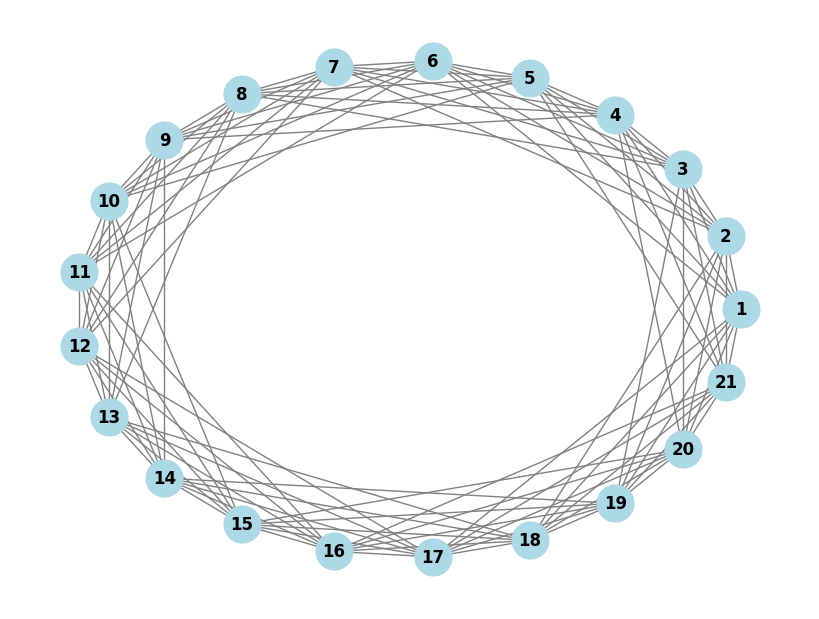

In [ ]:
graph = generate_1d_lattice_periodic(21,5)
plot_network_graph(graph)

## Exercise 4

In [ ]:
k = 10
lattices = []

for N in range(50,1000+1):
  graph = generate_1d_lattice_periodic(N,k)
  lattices.append(graph)

In [ ]:
avg_distances = []
for lattice in lattices:
  avg_distances.append(nx.average_shortest_path_length(lattice))

In [ ]:
q = 50
for i in avg_distances:
  if q in [50,100,200,300,400,500,600,700,800,900,1000]:
    print(f"With N = {q}, the ration to the average distance of {i} is {(i/q):.2f}")
  q=q+1

With N = 50, the ration to the average distance of 1.7755102040816326 is 0.04
With N = 100, the ration to the average distance of 2.9797979797979797 is 0.03
With N = 200, the ration to the average distance of 5.477386934673367 is 0.03
With N = 300, the ration to the average distance of 7.976588628762542 is 0.03
With N = 400, the ration to the average distance of 10.476190476190476 is 0.03
With N = 500, the ration to the average distance of 12.975951903807616 is 0.03
With N = 600, the ration to the average distance of 15.475792988313856 is 0.03
With N = 700, the ration to the average distance of 17.975679542203146 is 0.03
With N = 800, the ration to the average distance of 20.475594493116397 is 0.03
With N = 900, the ration to the average distance of 22.975528364849833 is 0.03
With N = 1000, the ration to the average distance of 25.475475475475477 is 0.03


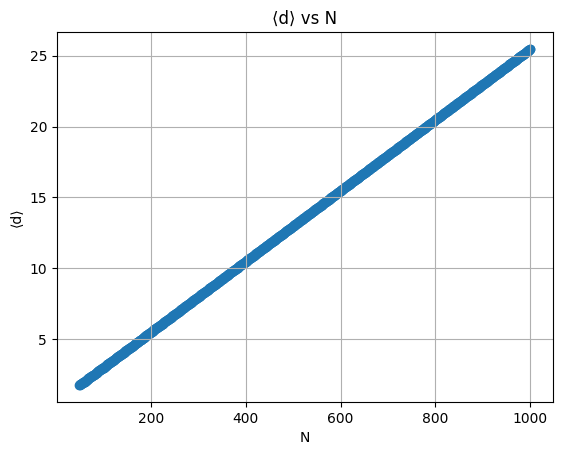

In [ ]:
x = list(range(50, 1000 + 1))
y = avg_distances

plt.scatter(x, y)

plt.xlabel('N')
plt.ylabel('⟨d⟩')
plt.title('⟨d⟩ vs N')
plt.grid()
plt.show()

The plot shows a linear relationship between $N$ and $\langle d \rangle$ .The average distance grows proportionally with the number of nodes. With every additional node the average distance increases by with any additional 100 nodes by approx. $3$.

## Exercise 5


In [ ]:
def generate_ws_model(N,k,p):
  # slide 56
  G = generate_1d_lattice_periodic(N,k)

  for node in range(1, N+1):
    edges = list(G.edges(node)) # copy, because G.edges will change during iteration
    for i, j in edges:
      if i < j and random.random() < p:
        G.remove_edge(i,j)
        l_choices = [x for x in range(1, N + 1) if x != node]
        l = random.choice(l_choices)
        G.add_edge(i, l)

  return G

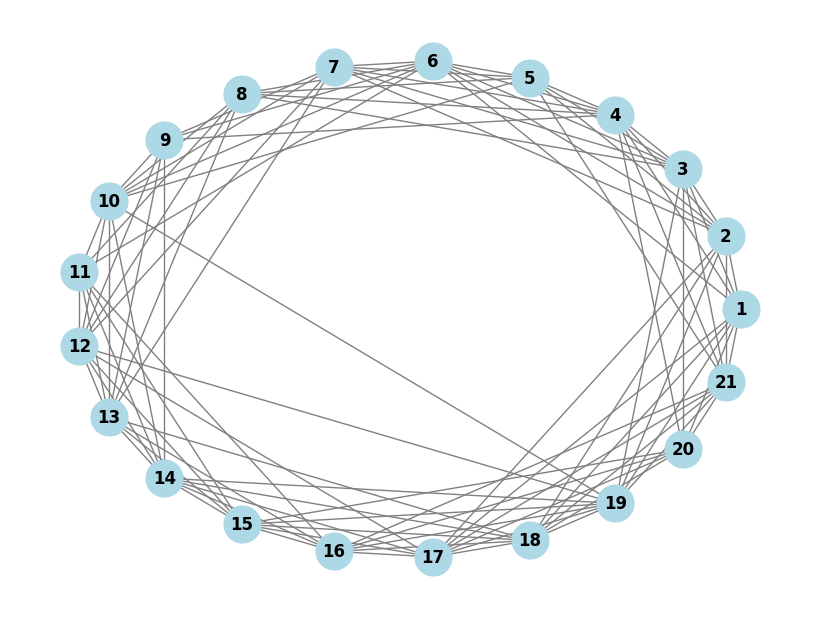

In [ ]:
ws = generate_ws_model(21,5,0.1)
plot_network_graph(ws)

## Exercise 6

https://snap.stanford.edu/class/cs224w-readings/watts98smallworld.pdf

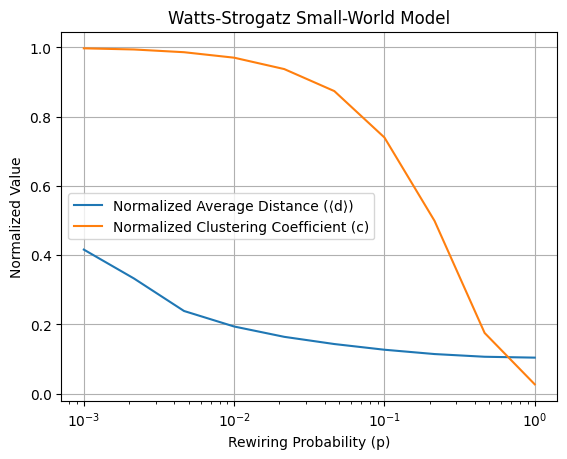

In [ ]:

# Parameters
N = 1000
k = 10
p_values = np.logspace(-3, 0, 10)  # Logarithmic spacing of p values

# Generate lattice for comparison
lattice = generate_1d_lattice_periodic(N, k)
c_lattice = nx.average_clustering(lattice)
d_lattice = nx.average_shortest_path_length(lattice)

# Store results
norm_avg_distances = []
norm_global_clustering_coefficients = []

# For each p value, compute average over multiple samples
num_samples = 10  # You can adjust this based on computation time
for p in p_values:
    avg_distances = []
    global_clustering_coefficients = []
    for _ in range(num_samples):
        ws = generate_ws_model(N, k, p)
        if nx.is_connected(ws):  # Ensure the graph is connected
            avg_distances.append(nx.average_shortest_path_length(ws))
            global_clustering_coefficients.append(nx.average_clustering(ws))

    # Compute normalized values
    norm_avg_distances.append(np.mean(avg_distances) / d_lattice)
    norm_global_clustering_coefficients.append(np.mean(global_clustering_coefficients) / c_lattice)

# Plot results
plt.figure()
plt.plot(p_values, norm_avg_distances, label='Normalized Average Distance (⟨d⟩)')
plt.plot(p_values, norm_global_clustering_coefficients, label='Normalized Clustering Coefficient (c)')
plt.xscale('log')
plt.xlabel('Rewiring Probability (p)')
plt.ylabel('Normalized Value')
plt.title('Watts-Strogatz Small-World Model')
plt.legend()
plt.grid(True)
plt.show()


For low
𝑝
p: The network behaves like a regular lattice with high clustering and long average path lengths.
As
𝑝
p increases: There is a transition where the average path length decreases rapidly while the clustering coefficient remains relatively high, corresponding to the "small-world" region.
For high
𝑝
p: The network behaves more like a random graph, with both low average path lengths and low clustering coefficients.
This plot essentially replicates the famous small-world phenomenon: the network maintains high clustering while also benefiting from the short path lengths of a random network over a range of intermediate
𝑝
p values.


## References

Menczer, F., Fortunato, S., & Davis, C. A. (2020). *A First Course in Network Science*. Cambridge: Cambridge
